In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import ast


In [2]:
dados = ("../dados/noticias_web_com_sentimento.csv")
df_dados_web=pd.read_csv(dados)

# Converter a coluna para listas reais
df_dados_web['analise_sentimento'] = df_dados_web['analise_sentimento'].apply(ast.literal_eval)


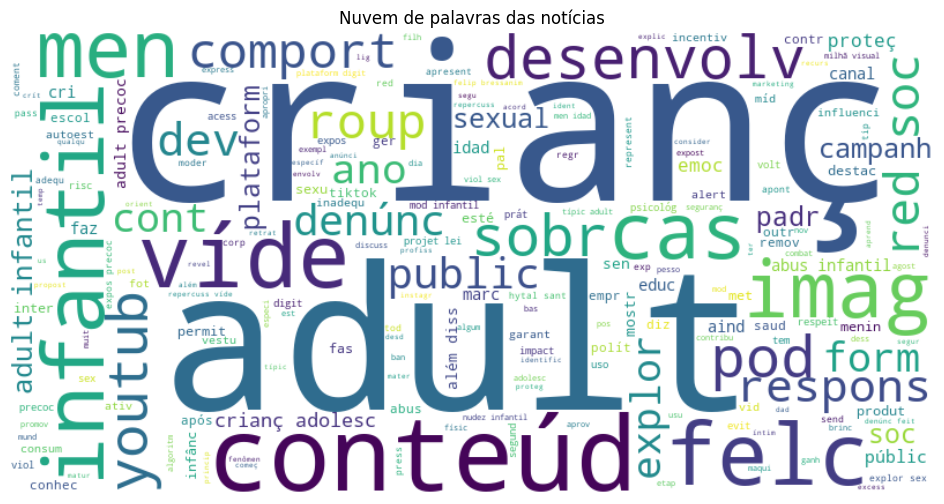

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

todos_tokens = []

# df_dados_web['analise_sentimento'] é uma coluna de listas de dicionários
for lista_sentencas in df_dados_web['analise_sentimento']:
    if isinstance(lista_sentencas, list):
        for sent in lista_sentencas:
            if isinstance(sent, dict) and 'tokens' in sent:
                todos_tokens.extend(sent['tokens'])

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(todos_tokens))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuvem de palavras das notícias")
plt.show()


C:\Users\Carolina\AppData\Local\Temp\ipykernel_18592\2976701990.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contagem.index, y=contagem.values, palette="viridis")


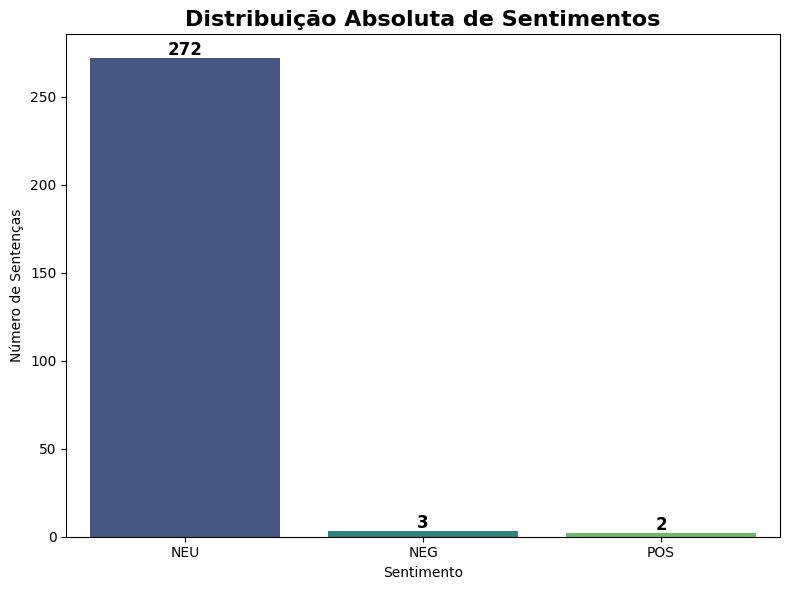

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extrair todos os rótulos de todas as sentenças
todos_rotulos = []
for lista_sentencas in df_dados_web['analise_sentimento']:
    if isinstance(lista_sentencas, list):  # garantir que seja lista
        for sent in lista_sentencas:
            if 'sentimento_label' in sent:
                todos_rotulos.append(sent['sentimento_label'])

# Contagem absoluta
contagem = pd.Series(todos_rotulos).value_counts()

# Proporção
proporcao = contagem / contagem.sum()

plt.figure(figsize=(8,6))
ax = sns.barplot(x=contagem.index, y=contagem.values, palette="viridis")

plt.title("Distribuição Absoluta de Sentimentos", fontsize=16, fontweight="bold")
plt.ylabel("Número de Sentenças")
plt.xlabel("Sentimento")

for i, v in enumerate(contagem.values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()



C:\Users\Carolina\AppData\Local\Temp\ipykernel_18592\3571954842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


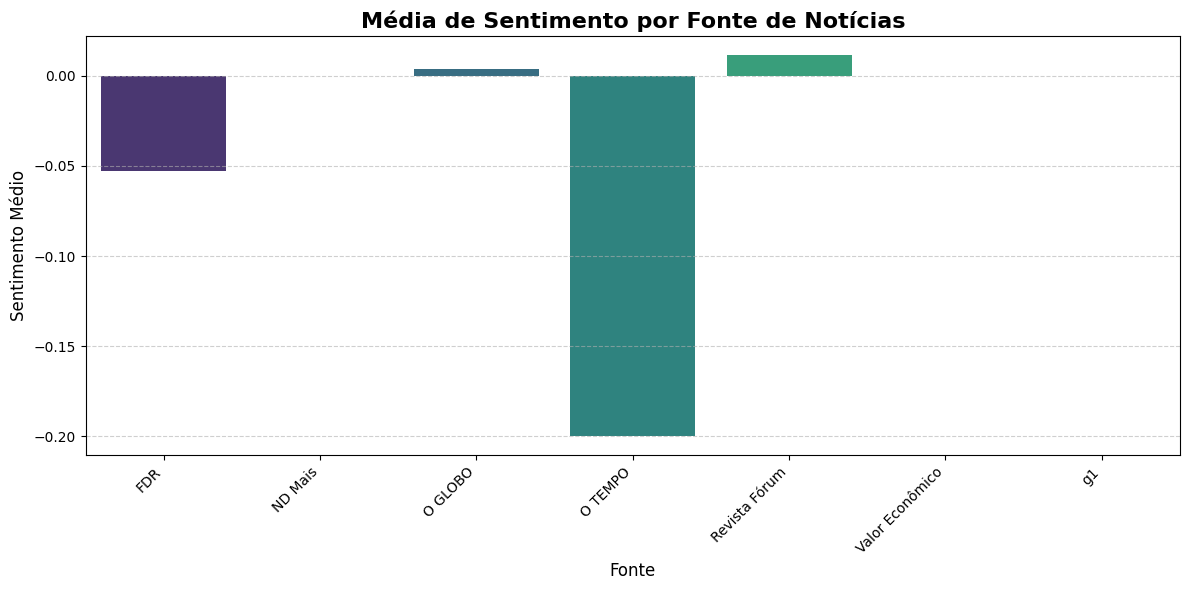

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_dados_web.groupby('Fonte')['sentimento_medio'].mean().reset_index(),
    x='Fonte', y='sentimento_medio',
    palette='viridis'  # degrade de cores
)
plt.title("Média de Sentimento por Fonte de Notícias", fontsize=16, fontweight='bold')
plt.xlabel("Fonte", fontsize=12)
plt.ylabel("Sentimento Médio", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()